<a href="https://colab.research.google.com/github/HussainBadreddeen/AutoML_Thesis/blob/main/hard_dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries needed and importing the dataset from google drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
from google.colab import drive
drive.mount('/content/drive')


file_path = "/content/drive/MyDrive/thesisdata/balanced-reviews.txt"

# Load as a DataFrame (change delimiter if needed)
df = pd.read_csv(file_path, sep="\t", encoding="utf-16")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I follow the CRISP-DM process here.
I've already done business understanding since I've mentioned the goal and objectives of this project is to compare AutoML for arabic sentiment analysis with manual tuning of hyperparameters

## **Data Understanding**

In [2]:
#first few rows
print(df.head())
print("----------------------------")
print()
#Number of Rows and coloumns
print('Number of rows and columns in the data set:', df.shape)
print("----------------------------")
print()
#Data types of the dataset
df.info()
print("----------------------------")
print()

# Display summary statistics for numerical features
print(df.describe())
print("----------------------------")
print()
#quick check if there are any missing values
print("Missing Values:")
print(df.isnull().sum())
print("----------------------------")
print()

   no Hotel name  rating    user type                   room type  \
0   2    فندق 72       2  مسافر منفرد  غرفة ديلوكس مزدوجة أو توأم   
1   3    فندق 72       5          زوج  غرفة ديلوكس مزدوجة أو توأم   
2  16    فندق 72       5          زوج                           -   
3  20    فندق 72       1          زوج          غرفة قياسية مزدوجة   
4  23    فندق 72       4          زوج  غرفة ديلوكس مزدوجة أو توأم   

            nights                                             review  
0  أقمت ليلة واحدة                  “ممتاز”. النظافة والطاقم متعاون.   
1  أقمت ليلة واحدة  استثنائي. سهولة إنهاء المعاملة في الاستقبال. ل...  
2      أقمت ليلتين  استثنائي. انصح بأختيار الاسويت و بالاخص غرفه ر...  
3  أقمت ليلة واحدة  “استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...  
4      أقمت ليلتين  جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كا...  
----------------------------

Number of rows and columns in the data set: (105698, 7)
----------------------------

<class 'pandas.core.frame.DataFrame'>

##since we know that we are trying to measure sentiment we focus on data related to reviews and their ratings

Amount of Values in the column: 105698
----------------------------
Number of unique ratings: 4
The unique values are:  [2 5 1 4]
----------------------------
Count of 'rating one': 14382                    Percentage of Total= 13.606690760468505 %
----------------------------
Count of 'rating two': 38467                    Percentage of Total= 36.3933092395315 %
----------------------------
Count of 'rating four': 26450                    Percentage of Total= 25.024125338227783 %
----------------------------
Count of 'rating five': 26399                    Percentage of Total= 24.975874661772217 %
----------------------------


<Axes: xlabel='rating', ylabel='count'>

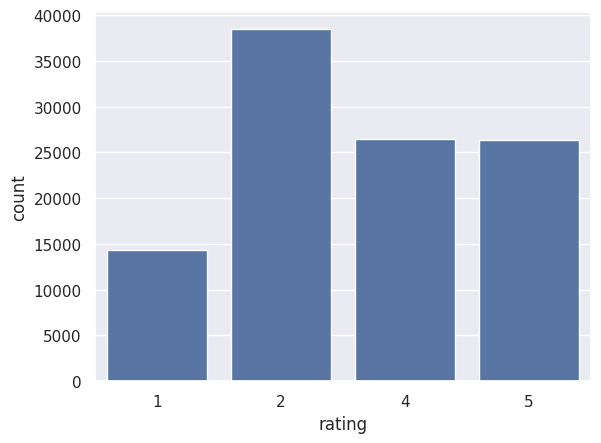

In [3]:
#Checking How many values are Unqiue from the total values for the Column rating
print("Amount of Values in the column:", df["rating"].count())
print("----------------------------")
unique_ratings = df['rating'].nunique()
print(f"Number of unique ratings: {unique_ratings}")
print("The unique values are: " ,df['rating'].unique())
#1,2,4,5 are the unique values as they represent either negative (1,2) or positive (4,5). 3 was removed in the balanced version of the dataset
print("----------------------------")

count_of_rating_1 = (df['rating'] == 1).sum()
print("Count of 'rating one':", count_of_rating_1, "                   Percentage of Total=", count_of_rating_1/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_2 = (df['rating'] == 2).sum()
print("Count of 'rating two':", count_of_rating_2, "                   Percentage of Total=", count_of_rating_2/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_4 = (df['rating'] == 4).sum()
print("Count of 'rating four':", count_of_rating_4, "                   Percentage of Total=", count_of_rating_4/df["rating"].count()*100,"%")
print("----------------------------")

count_of_rating_5 = (df['rating'] == 5).sum()
print("Count of 'rating five':", count_of_rating_5, "                   Percentage of Total=", count_of_rating_5/df["rating"].count()*100,"%")
print("----------------------------")

#We can plot the number of ratings for each in a small graph here
sns.countplot(x = 'rating', data = df)
#(1-2)= negative
#(4-5)= positive

## We group ratings (1-2) and (4,5) to show total count of negative and positive sentiment respectively

Count of 'negative sentiment': 52849                    Percentage of Total= 50.0 %
Count of 'positive sentiment': 52849                    Percentage of Total= 50.0 %


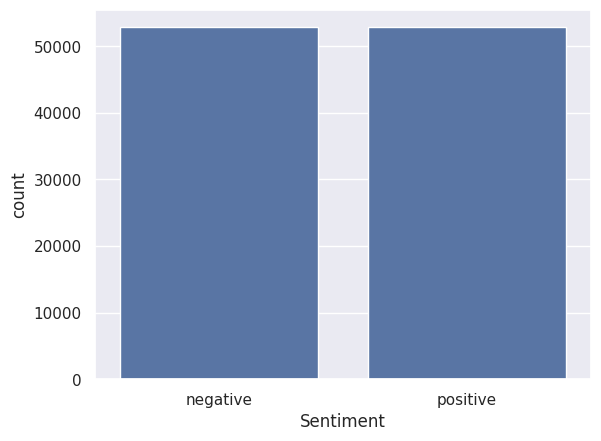

In [4]:
#we create a new data frame called sentiment to have only positive and negative classes so we can compare safely without skewing the original data set
df['Sentiment'] = df['rating'].apply(lambda rating : 'negative' if rating < 4 else 'positive')

#we then plot the total count of each sentiment
sns.countplot(x = 'Sentiment', data = df)

negative_sentiment = (df['Sentiment'] == 'negative').sum()
print("Count of 'negative sentiment':", negative_sentiment, "                   Percentage of Total=", negative_sentiment/df["Sentiment"].count()*100,"%")

positive_sentiment = (df['Sentiment'] == 'positive').sum()
print("Count of 'positive sentiment':", positive_sentiment, "                   Percentage of Total=", positive_sentiment/df["Sentiment"].count()*100,"%")

#Data set appears to be prefectly balanced

##since we've covered the ratings we move on to the reviews

count                     105698
unique                    104036
top       استثنائي. كل شي. لا شي
freq                          62
Name: review, dtype: object

Sample Reviews:
 26027           ممتاز. كل شي. بعد باب النساء من موقع الفندق
100278    “حسبنا الله ونعم الوكيل في قلة مروتهم فلا إنسا...
33573     “فندق سىء ، ولكن سعره رخيص”. لا شىء سوى السعر....
102141    ضعيف. لاشي بعد حجزي عالبوكينغ وصلت ووجدت الحجز...
21574     “مناسب جدا”. حالة المبنى والأثاث والتجهيزات وا...
Name: review, dtype: object
Reviews with English: 2711
Reviews with Emojis: 752
Reviews with Both English & Emojis: 35

Sample Reviews with English:
['ضعيف. اتعلاشيئ. تعامتعاReceptionists deal falls short of the 5-star hotel There are places to sit and Atnzim in the reception area Some officers carry bags beggars and their style of work falls short of the hotel Entry and exit from the hotel to the campus is not as easy as passing more than elevator and Traffic market .. I would not advise never to live in the hotel.م

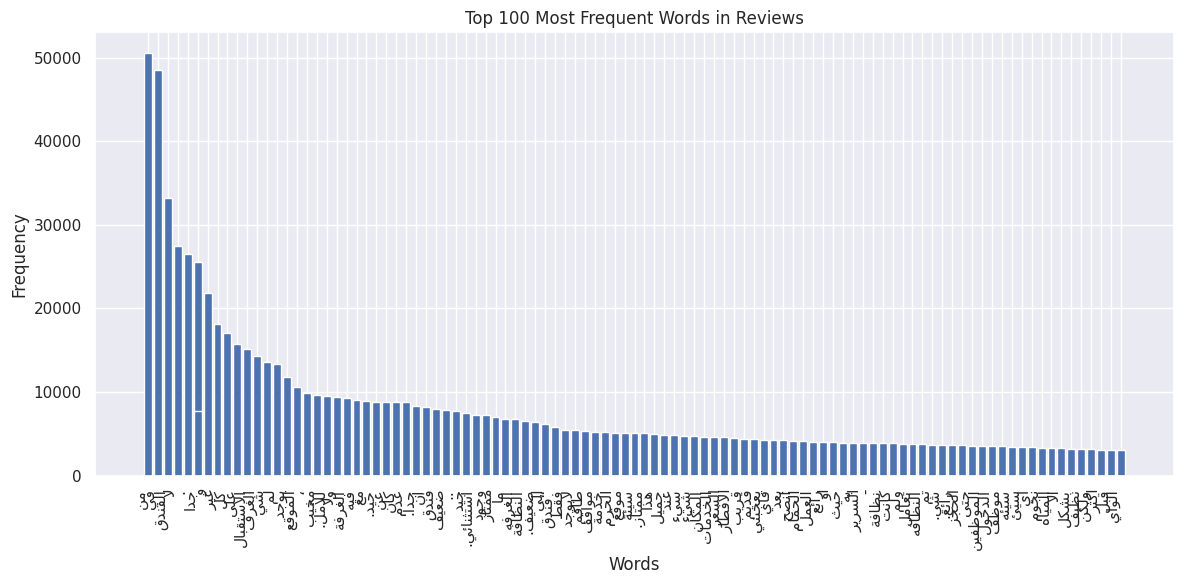

In [5]:
!pip install arabic-reshaper
!pip install python-bidi

from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display

# Inspect the review column
print(df['review'].describe())  # Basic statistics (count, unique, top, freq)
print("\nSample Reviews:\n", df['review'].sample(5))  # Print random 5 reviews


#under here is chatgpt
!pip install emoji
import re
import emoji

# Function to check if a review contains English letters
def contains_english(text):
    return bool(re.search(r'[a-zA-Z]', text))

# Function to check if a review contains emojis
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

# Apply functions to create new columns
df["has_english"] = df["review"].apply(contains_english)
df["has_emoji"] = df["review"].apply(contains_emoji)

# Check if a review has both English & emoji
df["has_both"] = df["has_english"] & df["has_emoji"]

num_english = df["has_english"].sum()
num_emoji = df["has_emoji"].sum()
num_both = df["has_both"].sum()

print(f"Reviews with English: {num_english}")
print(f"Reviews with Emojis: {num_emoji}")
print(f"Reviews with Both English & Emojis: {num_both}")


print("\nSample Reviews with English:")
print(df[df["has_english"]]["review"].sample(5).tolist())

print("\nSample Reviews with Emojis:")
print(df[df["has_emoji"]]["review"].sample(5).tolist())

print("\nSample Reviews with Both English & Emojis:")
print(df[df["has_both"]]["review"].sample(5).tolist())





# Combine all reviews into a single string
all_reviews = ' '.join(df['review'].astype(str))

# Tokenization (splitting into words)
words = all_reviews.split()

# Count word frequencies
word_counts = Counter(words)

# Get the top 100 most frequent words
top_100_words = word_counts.most_common(100)

# Prepare Arabic words for visualization
words, counts = zip(*top_100_words)
reshaped_words = [reshape(word) for word in words]
display_words = [get_display(word) for word in reshaped_words]

# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.bar(display_words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 100 Most Frequent Words in Reviews")
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()





since we've inspected our main 2 attributes rating and review. we move on to data preperation where we drop other columns and start preprocessing the reviews

##**Data preperation**

In [6]:
df_copy = df[['rating', 'review']].copy()

##to better see reviews #chatGPT
pd.set_option('display.max_colwidth', None)  # Prevents text shrinking
pd.set_option('display.width', 1000)  # Adjusts display width


df_copy.head()

,rating,review
0,2,“ممتاز”. النظافة والطاقم متعاون.
1,5,استثنائي. سهولة إنهاء المعاملة في الاستقبال. لاشيئ
2,5,استثنائي. انصح بأختيار الاسويت و بالاخص غرفه رقم 801. نوعية الارضيه
3,1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق 2 نجمه
4,4,جيد. المكان جميل وهاديء. كل شي جيد ونظيف بس كان حوض السباحه لايعمل في هذي الفتره حسب كلامهم يقولوا فيه صيانه والله اعلم


##We start with Normalizing the arabic text

In [7]:
!pip install --no-deps camel-tools



 english represents only 2.56% we remove it to focus on arabic as this is the gap.
emojis are converted because they hold sentiment

In [8]:
#To normalize arabic text we need to removing diacritics (tashkeel), removing elongation of words (tatweel) converting variations of the same certain letter to a standard unified form
#couldnt use farasa so opted for camel tools

# !pip install farasa # cant normalise with it :( docs arent available and cant sign up
# !pip install camel-tools
import re
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.dediac import dediac_ar


punctuation_pattern = re.compile(r"[-،؟.!\"':;(){}“”‘’,.&+\^\*\%@#/~=_\[\]<>|\\\n\t]")# Remove Arabic & English punctuation
quotes_pattern = re.compile(r'[\"\'“”‘’]')  # Matches only quotation marks (Arabic & English)


def remove_elongation(text):
    # Rule 1: Remove if a letter is repeated 3+ times anywhere
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Rule 2: Remove if a letter is repeated 2+ times at the end of the word
    text = re.sub(r'(\w)\1$', r'\1', text)

    return text


# Dictionary to store emoji conversions
emoji_conversion_log = {}

def convert_emojis_to_arabic(text):
    converted_text = emoji.demojize(text, language='ar')  # 😍 → ":وجه_بعيون_على_شكل_قلوب:"
    converted_text_cleaned = converted_text.replace(":", "").replace("_", " ")  # :"وجه بعيون على شكل قلوب"

    # Log changes if an emoji was actually converted
    if text != converted_text:
        emoji_conversion_log[text] = converted_text_cleaned

    return converted_text_cleaned


def preprocess_text(text):
    text = normalize_unicode(text)  # Step 1: Normalize Unicode
    text = dediac_ar(text)  # Step 2: Remove diacritics OR TASHKEEL da bardo camel tools
    text = remove_elongation(text)  # Step 3: Remove elongation ## removes momtaz and other normal arabic words a workaround could be 3+ letters but will try to find a library first. update: didnt find but this seems to be working fine
    #camel tools letter normalization next:
    text = normalize_alef_maksura_ar(text)  # Step 4: Normalize ى → ي
    text = normalize_teh_marbuta_ar(text)  # Step 5: Normalize ة → ه
    text = normalize_alef_ar(text) # step 6:  Normalize alef variants to 'ا'

    text = re.sub(r'[٠-٩]', lambda x: str(ord(x.group()) - ord('٠')), text)  # Step : Convert Arabic numbers to English
    text = re.sub(r'\d+', '', text)  # Step 7: Remove all numbers ##for now i wont reemove cause ## update i will remove and test

    text = punctuation_pattern.sub('', text)  # Step 8: Remove punctuation
    text = quotes_pattern.sub('', text)  # Step 9: Remove quotation marks (but keep text inside)


    # text = re.sub(r'(?<!\w)و(?=\w)', r'و ', text)  # Add space after و only if it's at the start
    # text = re.sub(r'(?<=\w)و(?!\w)', r' و', text)  # Add space before و only if it's at the end # Ensure "و" is separated only when it's at the beginning of a word
    # after testing the letter waaw is inconsistent so i will leave it as is
    text = convert_emojis_to_arabic(text)
    text = re.sub(r'\s+', ' ', text).strip() #remove spacez



    return text


print()
print("Before camel tools and manual normalization")
print(df_copy['review'].head(20))
print("----------------------------")
print()

#Normalization applied to entire DataFrame. the copy of the copy version nbot the original incase i break smth

#i make a seprate copy
df_normalized_reviews = df_copy.copy()#actually no need to do that bas eshta mklssl aghyr code tany

#applying normalization steps
df_normalized_reviews['normalized_review'] = df_normalized_reviews['review'].apply(preprocess_text)

#removing all reviews containing english
df_normalized_reviews = df_normalized_reviews[~df_normalized_reviews['normalized_review'].str.contains(r'[a-zA-Z]', regex=True)] #regex = true means it doesnt remove the exasct '[a-zA-Z]' '~' negates the condition keeping only non english rows

print(df_normalized_reviews.head())  # Check the result


#check for empty reviews after normalizaion and remove them

number_of_empty_reviews = (df_normalized_reviews["normalized_review"] == "").sum()
print("NUMBER OF ROWS WITHOUT ANYTHING AFTER NORMALIZATION:", number_of_empty_reviews)
#actual rows where they are empty after norm
print(df_normalized_reviews[df_normalized_reviews["normalized_review"] == ""])


# Removing rows
df_normalized_reviews = df_normalized_reviews[df_normalized_reviews["normalized_review"].str.strip() != ""]
number_of_empty_revs_after_removing =  (df_normalized_reviews["normalized_review"] == "").sum()
print("NUMBER OF ROWS WITHOUT ANYTHING AFTER removing:",number_of_empty_revs_after_removing)



#  some testing not needed at the end


# def contains_english(text):
#     return bool(re.search(r'[a-zA-Z]', text))

# Check for English in the normalized reviews
# df_copy["has_english"] = df_normalized_reviews["normalized_review"].apply(contains_english)

# # Count the number of reviews containing English
# num_reviews_with_english = df_normalized_reviews["has_english"].sum()
# print(f"\n Num of reviews containing English AFTER normalization: {num_reviews_with_english}")

# # Print some samples
# print("\n Sample of reviews still containing English (First 10)")
# print(df_normalized_reviews[df_normalized_reviews["has_english"]]["normalized_review"].head(10))

# # Remove the temporary column after testing
# df_normalized_reviews.drop(columns=["has_english"], inplace=True)

print(df_normalized_reviews.info())



# print(df_normalized_reviews.describe())
#the df df_normalized_reviews now has the original dataset,

# # Function to check if text still contains emojis
# def contains_emoji(text):
#     return any(char in emoji.EMOJI_DATA for char in text)

# #Check for emojis in the normalized reviews
# df["has_emoji"] = df["normalized_review"].apply(contains_emoji)

# #num of reviews with emojis
# num_reviews_with_emojis = df["has_emoji"].sum()
# print(f"\n Num of reviews containing emojis AFTER normalization: {num_reviews_with_emojis}")


# #sample of emoji conversions
# print("\n sample of Emoji Conversions (First 10)")
# for original, converted in list(emoji_conversion_log.items())[:10]:
#     print(f"{original} → {converted}")

# print("After camel tools and manual normalization")
# print(df['normalized_review'].head(20))
# print("----------------------------")
# print()


Before camel tools and manual normalization
0                                                                                                                                                                                    “ممتاز”. النظافة والطاقم متعاون. 
1                                                                                                                                                                   استثنائي. سهولة إنهاء المعاملة في الاستقبال. لاشيئ
2                                                                                                                                                  استثنائي. انصح بأختيار الاسويت و بالاخص غرفه رقم 801. نوعية الارضيه
3                                                                                                                                                                “استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق 2 نجمه 
4                                                                                              

In [9]:
print(df_normalized_reviews[df_normalized_reviews["normalized_review"] == ""])


Empty DataFrame
Columns: [rating, review, normalized_review]
Index: []


In [10]:
# a  quick check to see if english reviews that were removed make the dataset imbalanced
pos = (df_normalized_reviews['rating'] >= 4).sum()
neg = (df_normalized_reviews['rating'] < 4).sum()

print("Positive reviews:", pos)
print("Negative reviews:", neg)

#dataset appears to still be balanced :) just 120 reviewss diff

Positive reviews: 51541
Negative reviews: 51421


## After normalizing text we do Tokenization

In [11]:
from camel_tools.tokenizers.word import simple_word_tokenize

# Tokenize the normalized reviews in the new col named tokens
df_normalized_reviews['tokens'] = df_normalized_reviews['normalized_review'].apply(lambda x: simple_word_tokenize(x)) #takes a bit of time but works good, cant find its stemmer though cant find it in docs so no stemmer?

# verify tokenization
print(df_normalized_reviews[['normalized_review', 'tokens']].head(20))


print(df_normalized_reviews.describe())

                                                                                                                                                                                              normalized_review                                                                                                                                                                                                                                         tokens
0                                                                                                                                                                                  ممتاز النظافه والطاقم متعاون                                                                                                                                                                                                              [ممتاز, النظافه, والطاقم, متعاون]
1                                                                                                         

## **We then remove stop words**

In [12]:
# Mounting Google Drive tany for stopwords file
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

# #eng stop wrods
# nltk.download("stopwords")

# nltk_stopwords = set(stopwords.words("english"))

# loading the arabic stopwords customized list
stopwords_file_path = "/content/drive/MyDrive/thesisdata/updated_stopwords.txt"
custom_stopwords = set(pd.read_csv(stopwords_file_path, header=None, encoding="utf-8")[0].tolist())

# # combing both stopwords lists
# all_stopwords = nltk_stopwords.union(custom_stopwords)

#will no longer consider english so no need to remove english stopwords as i removed all reveiws containing english during normalization

# applying stopwords removal from normalized tezxt
df_normalized_reviews["filtered_tokens"] = df_normalized_reviews["tokens"].apply(lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords])

#Counting removed stopwords
removed_words = []
for original, filtered in zip(df_normalized_reviews["tokens"], df_normalized_reviews["filtered_tokens"]):
    removed_words.extend([word for word in original if word.lower() in custom_stopwords])

removed_counts = Counter(removed_words)

#showing top 200 most removed words
print("Most removed stopwords:", removed_counts.most_common(200))



#most frequent words after stopword removal
remaining_words = []
for filtered in df_normalized_reviews["filtered_tokens"]:
    remaining_words.extend(filtered)

remaining_counts = Counter(remaining_words)

# top 200 words after stopwords removal
print("\n Most frequent words after stopwords removal:")
print(remaining_counts.most_common(400))


#sample res
print("Tokens before filtering stopwords:\n", df_normalized_reviews["tokens"].head(10))
print("\nTokens after filtering stopwords:\n", df_normalized_reviews["filtered_tokens"].head(10))

print(df_normalized_reviews.info()) # hjust to make sure im using the correct stuff


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Most removed stopwords: [('من', 49109), ('في', 47550), ('علي', 17110), ('فيه', 10806), ('ان', 10185), ('الي', 10038), ('عن', 8312), ('به', 5189), ('او', 4789), ('عند', 4613), ('اي', 4222), ('بعد', 4175), ('حيث', 3811), ('تم', 3542), ('انه', 3454), ('بشكل', 3158), ('قبل', 2989), ('بعض', 2922), ('جميع', 2872), ('فيها', 2776), ('التي', 2153), ('احد', 2062), ('بسبب', 1914), ('بها', 1755), ('الذي', 1666), ('اذا', 1519), ('عام', 1517), ('عليه', 1445), ('ايضا', 1281), ('درهم', 1272), ('خمس', 1232), ('بين', 1232), ('اول', 1229), ('ع', 1155), ('بان', 1064), ('اليوم', 1024), ('ب', 974), ('تكون', 954), ('ايام', 875), ('بهذا', 859), ('ف', 839), ('انها', 835), ('ثلاث', 835), ('الوقت', 789), ('امام', 753), ('تحت', 729), ('عندما', 711), ('خارج', 688), ('خلال', 683), ('عدد', 652), ('عليك', 636), ('فوق', 635), ('اليه', 623), ('بل', 620), ('عليها', 616), ('اما', 614), ('الثاني

##After tokenization and removing stop words we whould now have a cleaned dataset. we can now proceed with lemmatization/stemming to bring words back to their root form.

#we try different tools:

#1-stranza by stanford: #GENERATED WITH GPT will revisit cause he made a mistake and this takes time to run

In [13]:
# import stanza
# import pandas as pd
# from collections import Counter
# from camel_tools.utils.dediac import dediac_ar

# # ✅ Load Stanza Pipeline (Only Needed Once)
# stanza.download("ar")
# nlp = stanza.Pipeline("ar", processors="tokenize,lemma")

# # ✅ Function: Lemmatize with & without diacritics
# def lemmatize_arabic(text):
#     """Returns both diacritized & non-diacritized lemmas"""
#     try:
#         doc = nlp(text)
#         lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
#         return lemmas, [dediac_ar(lemma) for lemma in lemmas]  # Keep both forms
#     except Exception as e:
#         print(f"⚠️ Stanza Lemmatization Failed: {e}")
#         return [], []

# # ✅ Apply Lemmatization
# df["stanza_lemmatized_diac"], df["stanza_lemmatized_no_diac"] = zip(*df["filtered_tokens"].apply(
#     lambda tokens: lemmatize_arabic(" ".join(tokens))
# ))

# # ✅ Compute Evaluation Metrics
# def evaluate_lemmatization(original_tokens, lemmatized_tokens):
#     unique_original = set(original_tokens)
#     unique_lemmas = set(lemmatized_tokens)

#     if len(unique_original) == 0:
#         return 0.0, 0.0

#     changed_words = sum(1 for o, l in zip(original_tokens, lemmatized_tokens) if o != l)
#     inconsistent_words = sum(1 for word, count in Counter(lemmatized_tokens).items() if count > 1)

#     reduction_rate = ((len(unique_original) - len(unique_lemmas)) / len(unique_original)) * 100
#     consistency_score = (inconsistent_words / len(original_tokens)) * 100 if original_tokens else 0.0

#     return reduction_rate, consistency_score

# # ✅ Apply Evaluation
# df["reduction_rate"], df["consistency_score"] = zip(*df.apply(
#     lambda row: evaluate_lemmatization(row["filtered_tokens"], row["stanza_lemmatized_diac"]), axis=1
# ))

# # ✅ Check if Lemmatization Expands Words
# df["word_count_before"] = df["filtered_tokens"].apply(len)
# df["word_count_after"] = df["stanza_lemmatized_diac"].apply(len)
# df["word_count_change"] = df["word_count_after"] - df["word_count_before"]

# print("\n🔍 Checking word count changes (should not increase):")
# print(df[["word_count_before", "word_count_after", "word_count_change"]].head(10))

# # ✅ Display Sample Before & After
# print("\n🔍 Sample Before & After Lemmatization:")
# for orig, lemmatized_diac, lemmatized_no_diac in zip(
#     df["filtered_tokens"].head(10),
#     df["stanza_lemmatized_diac"].head(10),
#     df["stanza_lemmatized_no_diac"].head(10)
# ):
#     print(f"Original: {orig}\nLemmatized (Diac): {lemmatized_diac}\nLemmatized (No Diac): {lemmatized_no_diac}\n")

# # Compute Lemmatization Accuracy (If you have a gold standard)
# # if "correct_lemmas" in df.columns:
# #     def compute_accuracy(lemmatized, correct):
# #         matches = sum(1 for l, c in zip(lemmatized, correct) if l == c)
# #         return (matches / len(correct)) * 100 if correct else 0

# #     df["lemma_accuracy"] = df.apply(lambda row: compute_accuracy(row["stanza_lemmatized_diac"], row["correct_lemmas"]), axis=1)
# #     print(f"Lemmatization Accuracy: {df['lemma_accuracy'].mean():.2f}%")


##FarasaPy for stemming, documentation of farasa has lemmatization but farasaPy doesnt

In [14]:
#testing farasa py instead of arabert so that i dont need to downgrade libraries (emoji for some reason)
!pip install -U farasapy
from farasa.stemmer import FarasaStemmer # so farasapy's doc has stemming but farasa has lemmatization so will revisit after next dr. appointment but for now i like the results of the stemmer
#link: https://farasa.qcri.org/lemmatization/
#but this if proven to work with farasa only i might need to use Java or wrap myself

stemmer = FarasaStemmer(interactive=True)# from the doic here im not exactly sure what is the diff between interactive mode and normal: https://colab.research.google.com/drive/1xjzYwmfAszNzfR6Z2lSQi3nKYcjarXAW?usp=sharing#scrollTo=tn9qwsYgSsHx
#update i use interactive so that i do batch preprocessing because noirmal mode starts a new java process for each stem req independently so stem() doesnt restart so interactive mode Keeps the Java process running so faster (batch is better with interactive mode)
df_normalized_reviews["stemmed_text"] = df_normalized_reviews["filtered_tokens"].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]  # Stem each word separately cause i get a list error
)

#sample
print(df_normalized_reviews[["filtered_tokens", "stemmed_text"]].head())

# Terminate the stemmer to free resources this is a bestpractice
stemmer.terminate()





/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


100%|██████████| 241M/241M [11:22<00:00, 353kiB/s]


[2025-04-04 18:39:33,326 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


                                                                                                                   filtered_tokens                                                                                                      stemmed_text
0                                                                                                [ممتاز, النظافه, والطاقم, متعاون]                                                                                      [ممتاز, نظافه, طاقم, متعاون]
1                                                                             [استثنائي, سهوله, انهاء, المعامله, الاستقبال, لاشيئ]                                                                    [استثنائي, سهل, إنهاء, معامله, استقبال, لاشيئ]
2                                                         [استثنائي, انصح, باختيار, الاسويت, و, بالاخص, غرفه, رقم, نوعيه, الارضيه]                                                   [استثنائي, انصح, اختيار, اسويت, و, اخص, غرفة, رقم, نوعي, ارضيه]
3                   

##After stemming with farasa we can now proceed to word embeddings so that ML models understand words. here we use **TF-IDF**

In [15]:
df_normalized_reviews.info()#mkaing sure  i have a col for each step i did
from sklearn.feature_extraction.text import CountVectorizer

# Init, i use it to know how many unique words i have now to see how big of a vocab i should use with tf
vectorizer = CountVectorizer()

# Ensure the text is in string format and not just tokens cause it cant run on tokens
df_normalized_reviews["stemmed_text"] = df_normalized_reviews["stemmed_text"].apply(lambda x: " ".join(x) if isinstance(x, list) else x) ##chatgpt cause i didnt know how


vectorizer.fit(df_normalized_reviews["stemmed_text"])


print("Total unique words before TF-IDF:", len(vectorizer.vocabulary_))



<class 'pandas.core.frame.DataFrame'>
Index: 102962 entries, 0 to 105697
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   rating             102962 non-null  int64 
 1   review             102962 non-null  object
 2   normalized_review  102962 non-null  object
 3   tokens             102962 non-null  object
 4   filtered_tokens    102962 non-null  object
 5   stemmed_text       102962 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.5+ MB
Total unique words before TF-IDF: 71030


saving the df for later so i dont have to reload runtime a lot

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')
df_normalized_reviews.to_csv("/content/drive/My Drive/processed_data.csv", index=False, encoding="utf-8-sig") #fixed it utf-8 doesnt wokr although it did before

#load it back
# df_normalized_reviews = pd.read_csv("/content/drive/My Drive/processed_data.csv")


#since tf-idf breaks my ram and env i try cuML:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # this is good: https://www.youtube.com/watch?v=rcovF6S1oFI
tfidf_vectorizer = TfidfVectorizer(max_features=9000)  #setting max features to non would basically run tf-idf on all 71030 unique words which is absurd. ill test around 20k-50k will revisit pending looking at documentation and a few tutorials more

# Fit and transform the stemmed text
tfidf_matrix = tfidf_vectorizer.fit_transform(df_normalized_reviews["stemmed_text"])

# Convert sparse matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Merge with the original DataFrame
df_normalized_reviews = pd.concat([df_normalized_reviews, tfidf_df], axis=1)


print(df_normalized_reviews.head())
print(df_normalized_reviews.info())
#session crashes not enough rammmmmmmmmmmmmmmmm. i can run max of 7.5k or around that

##We now have our reviews in a numerical form and ready for modelling

In [ ]:
# pip install -U scikit-learn==1.2.2


In [ ]:
# prompt: i would like to install and run tpot to find the best hyperparameters using the result of tf-idf and rating as the target variable. use default parameters. show evaluation and save and show the best model with the best parameters. only use the tf-idf result (tfidf_df) and not all of the dataframe as i have many columns each represnting a part where i clean

!pip install tpot

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Assuming 'tfidf_df' and 'rating' are defined in your previous code
X = tfidf_df
y = df_normalized_reviews['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42) #default params
tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))

tpot.export('tpot_exported_pipeline.py')

tpot.fitted_pipeline_


In [ ]:
!pip install tpot
.p,9
from sklearn.model_selection import train_test_split, cross_val_score
from tpot import TPOTClassifier
# import pickle



# Ensure correct data types
X = df_normalized_reviews.drop(columns=["rating"]).astype(float)  # we drop rating from the reviews here
y = df_normalized_reviews["rating"].astype(int)  # Ensure ratings are integers

# conv ratings into a binary classification (Positive = 1, Negative = 0) as mentioned earlier (1,2 negative and 4,5 are positive with no neutral)
y = y.apply(lambda x: 1 if x >= 4 else 0)

#correct shapes
print(f"Feature Matrix Shape: {X.shape}, Target Vector Shape: {y.shape}")

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # the norm
)
print(f"Training Size: {X_train.shape}, Testing Size: {X_test.shape}")

tpot = TPOTClassifier() #init of the tpot classifier with default settings which are the following from the docs:
# generations	100	            Number of iterations TPOT runs for optimization.
# population_size	100	        Number of pipelines in each generation.
# offspring_size	None        (same as population_size)	Number of new pipelines created per generation.
# mutation_rate	0.9	          Probability of mutation in the genetic algorithm.
# crossover_rate	0.1	        Probability of crossover (recombining pipelines).
# scoring	'accuracy'	        Evaluation metric (can be changed to precision, recall, etc.).
# cv	5	                      Default cross-validation strategy (5-fold CV).
# subsample	1.0	              Fraction of data used during optimization.
# n_jobs	1	                  Number of parallel jobs (-1 uses all CPU cores).
# max_time_mins	None	        No time limit by default.
# max_eval_time_mins	5	      Maximum time per pipeline evaluation (in minutes).
# early_stop	None	          No early stopping by default.
# config_dict	'TPOT sparse'	  Defines which models TPOT considers (e.g., classifiers, regressors).
# warm_start	False	          If True, TPOT continues training from previous state.
# memory	None	              Caching mechanism for pipelines.
# verbosity	0	                Controls logging level (0 = silent, 3 = detailed output).


#training to find best model
tpot.fit(X_train, y_train)

# Evaluate using cv
cv_scores = cross_val_score(tpot.fitted_pipeline_, X_train, y_train, cv=5)
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f" Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Evaluate TPOT on test data
test_accuracy = tpot.score(X_test, y_test)
print(f"TPOT Best Model Test Accuracy: {test_accuracy:.4f}")

#chatgpt from here
# Export the best model as a Python script
tpot.export("best_tpot_pipeline.py")

# Save the trained best model for later use
with open("tpot_best_model.pkl", "wb") as f:
    pickle.dump(tpot.fitted_pipeline_, f)
print("TPOT best model saved successfully!")
